##### Import essential packages:

In [57]:
import numpy as np
import pandas as pd
import pickle
import squidpy as sq
import seaborn as sns
import shout
from IPython.display import set_matplotlib_formats
import random
import scanpy as sc
import time

##### Global variable definitions:

In [58]:
adata_path='/Volumes/time-mach-14pro/adataTCL_celltype_annotated.pkl'
cluster_key='celltype'

In [3]:
with open(adata_path, 'rb') as f:
    Pkl=pickle.load(f)

In [60]:
patients_good=[]
patients_bad=[]
for i in Pkl:
    adata=Pkl[i]
    try:
        start = time.time()
        shout.all_scores(adata, cluster_key=cluster_key, radius=2)
        end = time.time()
        adata.uns['SHouT_execution_time']=end-start
        print('Patient#: '+str(i))
        patients_good.append(i)
    except:
        print('Patient# '+str(i)+': Not enough annotated (clustered) cells in image to generate spatial neighbors graph')
        patients_bad.append(i)
    

Patient#: 60
Patient#: 61
Patient#: 62
Patient#: 63
Patient#: 64
Patient#: 67
Patient#: 68
Patient#: 69
Patient#: 70
Patient#: 71
Patient#: 72
Patient#: 73
Patient#: 74
Patient#: 75
Patient#: 76
Patient#: 78
Patient#: 79
Patient#: 80
Patient#: 81
Patient#: 82
Patient#: 83
Patient#: 84
Patient#: 85
Patient#: 86
Patient#: 87
Patient#: 264
Patient#: 265
Patient#: 266
Patient#: 267
Patient#: 268
Patient#: 269
Patient#: 270
Patient#: 271
Patient#: 272
Patient#: 273
Patient#: 274
Patient#: 275
Patient#: 276
Patient#: 277
Patient#: 278
Patient#: 279
Patient#: 280
Patient#: 281
Patient#: 282
Patient#: 284
Patient#: 285
Patient#: 286
Patient#: 287
Patient# 291: Not enough annotated (clustered) cells in image to generate spatial neighbors graph
Patient#: 293
Patient# 294: Not enough annotated (clustered) cells in image to generate spatial neighbors graph
Patient#: 295
Patient#: 296
Patient#: 297
Patient#: 298
Patient#: 299
Patient#: 300
Patient#: 302
Patient#: 303
Patient#: 304
Patient#: 305
Pat

In [73]:
Pkl

{60: AnnData object with n_obs × n_vars = 1219 × 35
     obs: 'cell_id', 'celltype', 'local_entropy_2', 'local_homophily_2', 'egophily_2'
     uns: 'Group', 'Group_subtype', 'Age', 'Sex', 'patient_id', 'field_of_view', 'spatial', 'control_mean_expression', 'control_std_expression', 'cell_coordinates', 'global_entropy', 'global_homophily', 'SHouT_execution_time'
     obsm: 'segment_size', 'field_of_view', 'control_mean_expression', 'control_std_expression', 'Group', 'Group_subtype', 'Age', 'Sex', 'patient_label', 'spatial',
 61: AnnData object with n_obs × n_vars = 3370 × 35
     obs: 'cell_id', 'celltype', 'local_entropy_2', 'local_homophily_2', 'egophily_2'
     uns: 'Group', 'Group_subtype', 'Age', 'Sex', 'patient_id', 'field_of_view', 'spatial', 'control_mean_expression', 'control_std_expression', 'cell_coordinates', 'global_entropy', 'global_homophily', 'SHouT_execution_time'
     obsm: 'segment_size', 'field_of_view', 'control_mean_expression', 'control_std_expression', 'Group', '

In [74]:
adata

AnnData object with n_obs × n_vars = 435 × 35
    obs: 'cell_id', 'celltype', 'local_entropy_2', 'local_homophily_2', 'egophily_2'
    uns: 'Group', 'Group_subtype', 'Age', 'Sex', 'patient_id', 'field_of_view', 'spatial', 'control_mean_expression', 'control_std_expression', 'cell_coordinates', 'global_entropy', 'global_homophily', 'SHouT_execution_time'
    obsm: 'segment_size', 'field_of_view', 'control_mean_expression', 'control_std_expression', 'Group', 'Group_subtype', 'Age', 'Sex', 'patient_label', 'spatial'

In [75]:
adata.obs['celltype']

0      Endothelial cells
1      Endothelial cells
2      Endothelial cells
3      Endothelial cells
4      Endothelial cells
             ...        
430              Unknown
431              Unknown
432              Unknown
433              Unknown
434              Unknown
Name: celltype, Length: 435, dtype: object

In [76]:
adata.obs['celltype']

0      Endothelial cells
1      Endothelial cells
2      Endothelial cells
3      Endothelial cells
4      Endothelial cells
             ...        
430              Unknown
431              Unknown
432              Unknown
433              Unknown
434              Unknown
Name: celltype, Length: 435, dtype: object

In [87]:
LOCAL_ENTROPY_2={}
LOCAL_HOMOPHILY_2={}
EGOPHILY_2={}

DF=[]
for i in Pkl:
    if i not in patients_bad:
        df=pd.DataFrame()
        celltype=Pkl[i].obs['celltype']
        df['celltype']=celltype
        local_entropy_2=Pkl[i].obs['local_entropy_2']
        df['local_entropy_2']=local_entropy_2
        local_homophily_2=Pkl[i].obs['local_homophily_2']
        df['local_homophily_2']=local_homophily_2
        egophily_2=Pkl[i].obs['egophily_2']
        df['egophily_2']=egophily_2
        # ---
        df['cell_id']=Pkl[i].obs['cell_id']
        df['celltype']=Pkl[i].obs['celltype']
        df['cell_index_in_patient']=Pkl[i].to_df().index
        # ---
        df['Group']=Pkl[i].uns['Group']
        df['SHouT_execution_time']=Pkl[i].uns['SHouT_execution_time']
        df['patient_id']=Pkl[i].uns['patient_id']
        df['patient_index']=i
        # ---
        DF.append(df)
        # ---
    else:
        print('Patient# '+str(i)+' did not have enough annotated (clustered) cells to generate spatial neighborhood graph!')
DF=pd.concat(DF, axis=0)
conditions=np.unique(DF.Group)

Patient# 291 did not have enough annotated (clustered) cells to generate spatial neighborhood graph!
Patient# 294 did not have enough annotated (clustered) cells to generate spatial neighborhood graph!


In [88]:
DF

,celltype,local_entropy_2,local_homophily_2,egophily_2,cell_id,cell_index_in_patient,Group,SHouT_execution_time,patient_id,patient_index
0,Endothelial cells,0.261773,0.110048,0.800000,1,0,Eczema,4.698631,Eczema_01,60
1,Endothelial cells,0.626787,0.020239,0.551724,2,1,Eczema,4.698631,Eczema_01,60
2,Endothelial cells,0.245007,0.078829,0.850000,3,2,Eczema,4.698631,Eczema_01,60
3,Endothelial cells,0.512574,0.044974,0.631579,4,3,Eczema,4.698631,Eczema_01,60
4,Endothelial cells,0.453632,0.062500,0.647059,5,4,Eczema,4.698631,Eczema_01,60
...,...,...,...,...,...,...,...,...,...,...
430,Unknown,0.820498,0.008902,0.291667,431,430,T-Cell Lymphoma,1.271475,TCL_11,315
431,Unknown,0.794405,0.007642,0.222222,432,431,T-Cell Lymphoma,1.271475,TCL_11,315
432,Unknown,0.757444,0.011218,0.260870,433,432,T-Cell Lymphoma,1.271475,TCL_11,315
433,Unknown,0.807836,0.005917,0.111111,434,433,T-Cell Lymphoma,1.271475,TCL_11,315


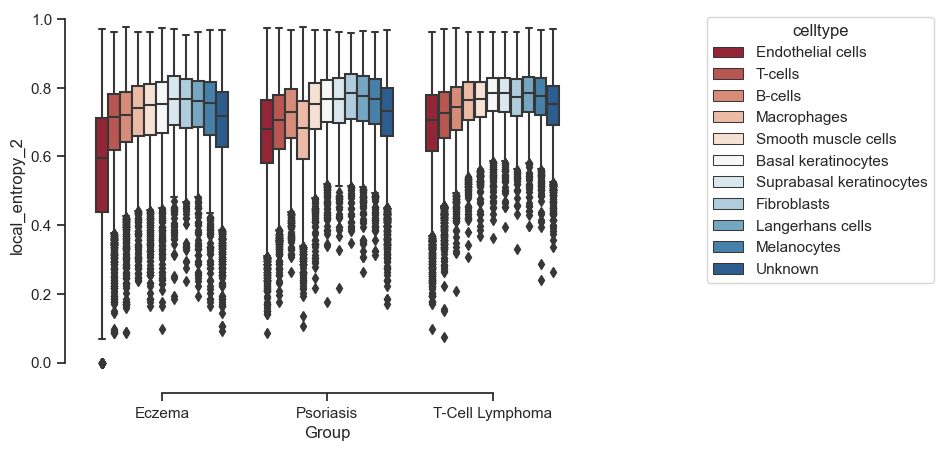

In [79]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
# ---
f=sns.boxplot(x="Group", y="local_entropy_2",
            hue="celltype", palette='RdBu',
            data=DF)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

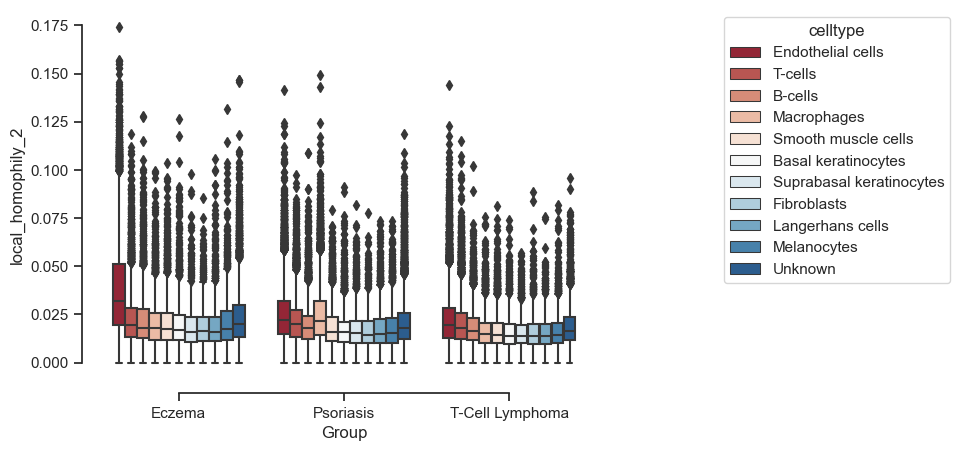

In [80]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
# ---
f=sns.boxplot(x="Group", y="local_homophily_2",
            hue="celltype", palette='RdBu',
            data=DF)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

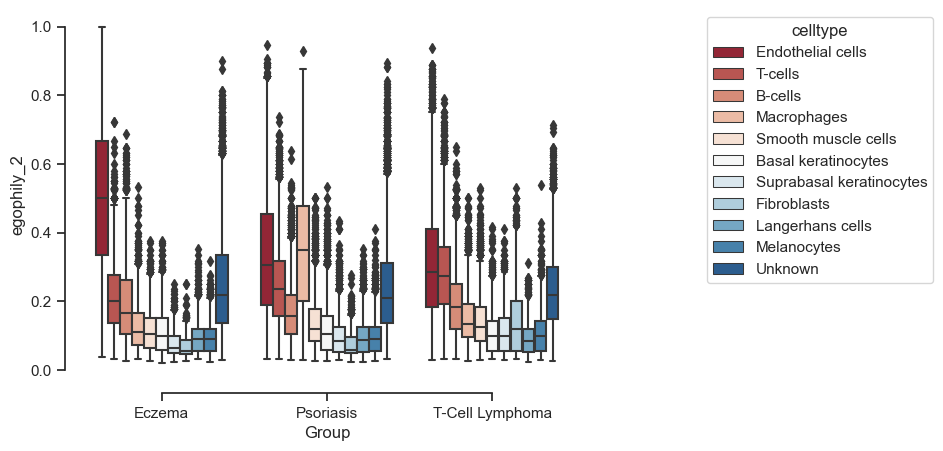

In [81]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
# ---
f=sns.boxplot(x="Group", y="egophily_2",
            hue="celltype", palette='RdBu',
            data=DF)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

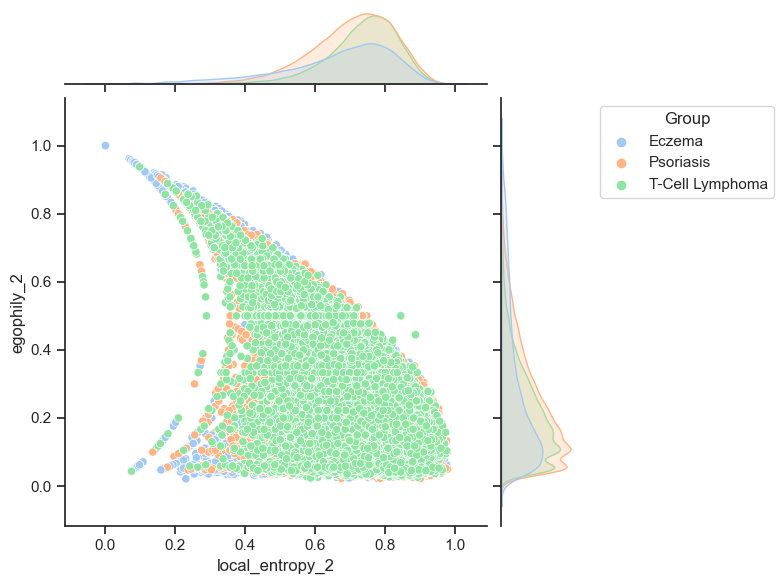

In [82]:
f = sns.jointplot(data=DF, x='local_entropy_2', y='egophily_2', hue='Group')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

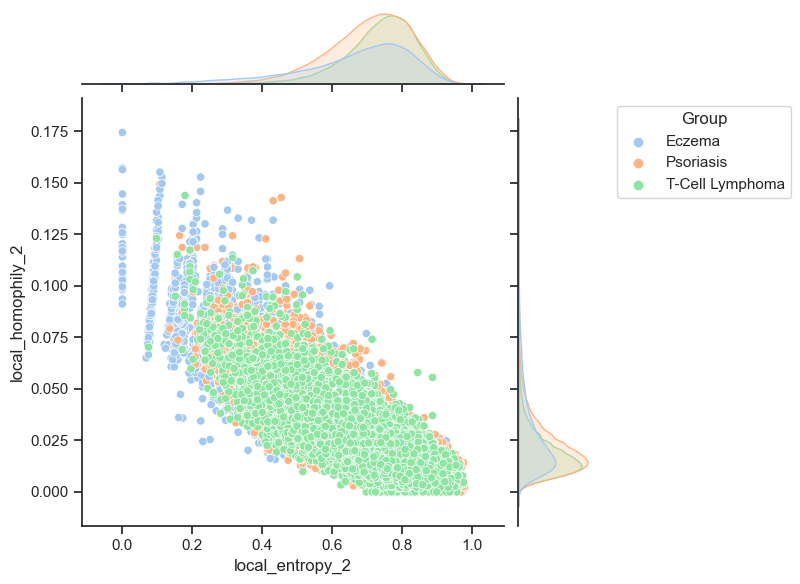

In [83]:
f = sns.jointplot(data=DF, x='local_entropy_2', y='local_homophily_2', hue='Group')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

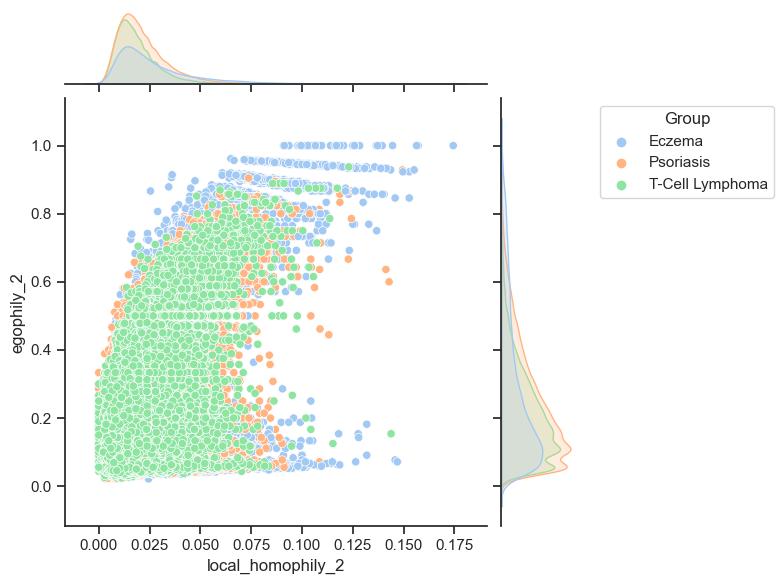

In [84]:
f = sns.jointplot(data=DF, x='local_homophily_2', y='egophily_2', hue='Group')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

# Scalability across varying no. of cells in tissue:

<Axes: xlabel='no. of cells in tissue', ylabel='SHouT_execution_time'>

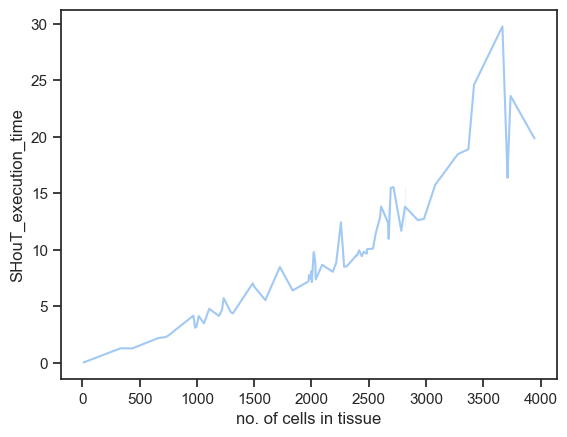

In [96]:
DF_TIME=[]
for i in patients_good:
    DF_time=DF[DF['patient_index']==i]
    df=pd.DataFrame()
    df['no. of cells in tissue']=[len(DF_time)]
    df['SHouT_execution_time']=DF_time['SHouT_execution_time'][0]
    df['patient_index']=DF_time['patient_index'][0]
    df['patient_id']=DF_time['patient_id'][0]
    DF_TIME.append(df)
DF_TIME=pd.concat(DF_TIME, axis=0)
# -----
sns.lineplot(data=DF_TIME, x="no. of cells in tissue", y="SHouT_execution_time", markers=True, dashes=False)

# Robustness across varying no. of cells in tissue:

In [93]:
DF_ROBUSTNESS=[]
for i in patients_good:
    DF_time=DF[DF['patient_index']==i]
    df=pd.DataFrame()
    df['no. of cells in tissue']=[len(DF_time)]
    df['SHouT_execution_time']=DF_time['SHouT_execution_time'][0]
    df['patient_index']=DF_time['patient_index'][0]
    df['patient_id']=DF_time['patient_id'][0]
    DF_TIME.append(df)
DF_TIME=pd.concat(DF_TIME, axis=0)
# -----
sns.lineplot(data=DF_TIME, x="no. of cells in tissue", y="SHouT_execution_time", markers=True, dashes=False)





f=sns.boxplot(x="Group", y="local_homophily_2",
            hue="celltype", palette='RdBu',
            data=DF_TIME)
sns.despine(offset=10, trim=True)
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

,no. of cells in tissue,SHouT_execution_time,patient_index,patient_id
0,1219,4.698631,60,Eczema_01
0,3370,18.899530,61,Eczema_02
0,3277,18.458618,62,Eczema_02
0,2033,10.040721,63,Eczema_03
0,2816,15.598001,64,Eczema_03
...,...,...,...,...
0,2562,11.509285,311,TCL_10
0,2000,8.113644,312,TCL_10
0,1977,7.770386,313,TCL_10
0,726,2.275978,314,TCL_11


# ==============================================================================================

In [39]:
DF_conditionWise={}
HETEROGENEITY_SCORES={}

for i in conditions:
    HETEROGENEITY_SCORES[i]={}
    DF_conditionWise[i]=DF[DF['Group']==i]
    for j in np.unique(DF_conditionWise[i].celltype):
        HETEROGENEITY_SCORES[i][j]=DF_conditionWise[i][DF_conditionWise[i]['celltype']==j]
        

In [85]:
DF_conditionWise
DF

,celltype,local_entropy_2,local_homophily_2,egophily_2,cell_id,cell_index_in_patient,Group,SHouT_execution_time
0,Endothelial cells,0.261773,0.110048,0.800000,1,0,Eczema,4.698631
1,Endothelial cells,0.626787,0.020239,0.551724,2,1,Eczema,4.698631
2,Endothelial cells,0.245007,0.078829,0.850000,3,2,Eczema,4.698631
3,Endothelial cells,0.512574,0.044974,0.631579,4,3,Eczema,4.698631
4,Endothelial cells,0.453632,0.062500,0.647059,5,4,Eczema,4.698631
...,...,...,...,...,...,...,...,...
430,Unknown,0.820498,0.008902,0.291667,431,430,T-Cell Lymphoma,1.271475
431,Unknown,0.794405,0.007642,0.222222,432,431,T-Cell Lymphoma,1.271475
432,Unknown,0.757444,0.011218,0.260870,433,432,T-Cell Lymphoma,1.271475
433,Unknown,0.807836,0.005917,0.111111,434,433,T-Cell Lymphoma,1.271475


In [41]:
HETEROGENEITY_SCORES

{'Eczema': {'B-cells':     celltype  local_entropy_2  local_homophily_2  egophily_2  cell_id   
  812  B-cells         0.785670           0.004040    0.095238      813  \
  813  B-cells         0.727023           0.007979    0.080000      814   
  814  B-cells         0.582680           0.031034    0.058824      815   
  815  B-cells         0.561005           0.016178    0.107143      816   
  816  B-cells         0.483835           0.057851    0.062500      817   
  ..       ...              ...                ...         ...      ...   
  769  B-cells         0.717376           0.014311    0.363636      770   
  770  B-cells         0.885975           0.003984    0.142857      771   
  771  B-cells         0.721459           0.020528    0.166667      772   
  772  B-cells         0.754760           0.010486    0.275862      773   
  773  B-cells         0.756137           0.021605    0.166667      774   
  
      cell_index_in_patient   Group  
  812                   812  Eczema  


In [20]:
dict(zip(celltype, local_entropy_2))

{'Endothelial cells': 0.64334580355065,
 'T-cells': 0.7332442244921995,
 'B-cells': 0.8393580264497739,
 'Macrophages': 0.6456143203732786,
 'Smooth muscle cells': 0.6669270650510768,
 'Basal keratinocytes': 0.8806184600553073,
 'Suprabasal keratinocytes': 0.7402846275806627,
 'Fibroblasts': 0.9363092770900608,
 'Langerhans cells': 0.6066256232400179,
 'Melanocytes': 0.8410845038445054,
 'Unknown': 0.6645007602725548}